In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
datasets = [
    "ETTh1", "ETTh2", "ETTm1", "ETTm2",
    "Weather", "ECL", "Traffic", "ILI"
]

colors = ['#2878B5', '#9AC9DB']  # 蓝色系配色


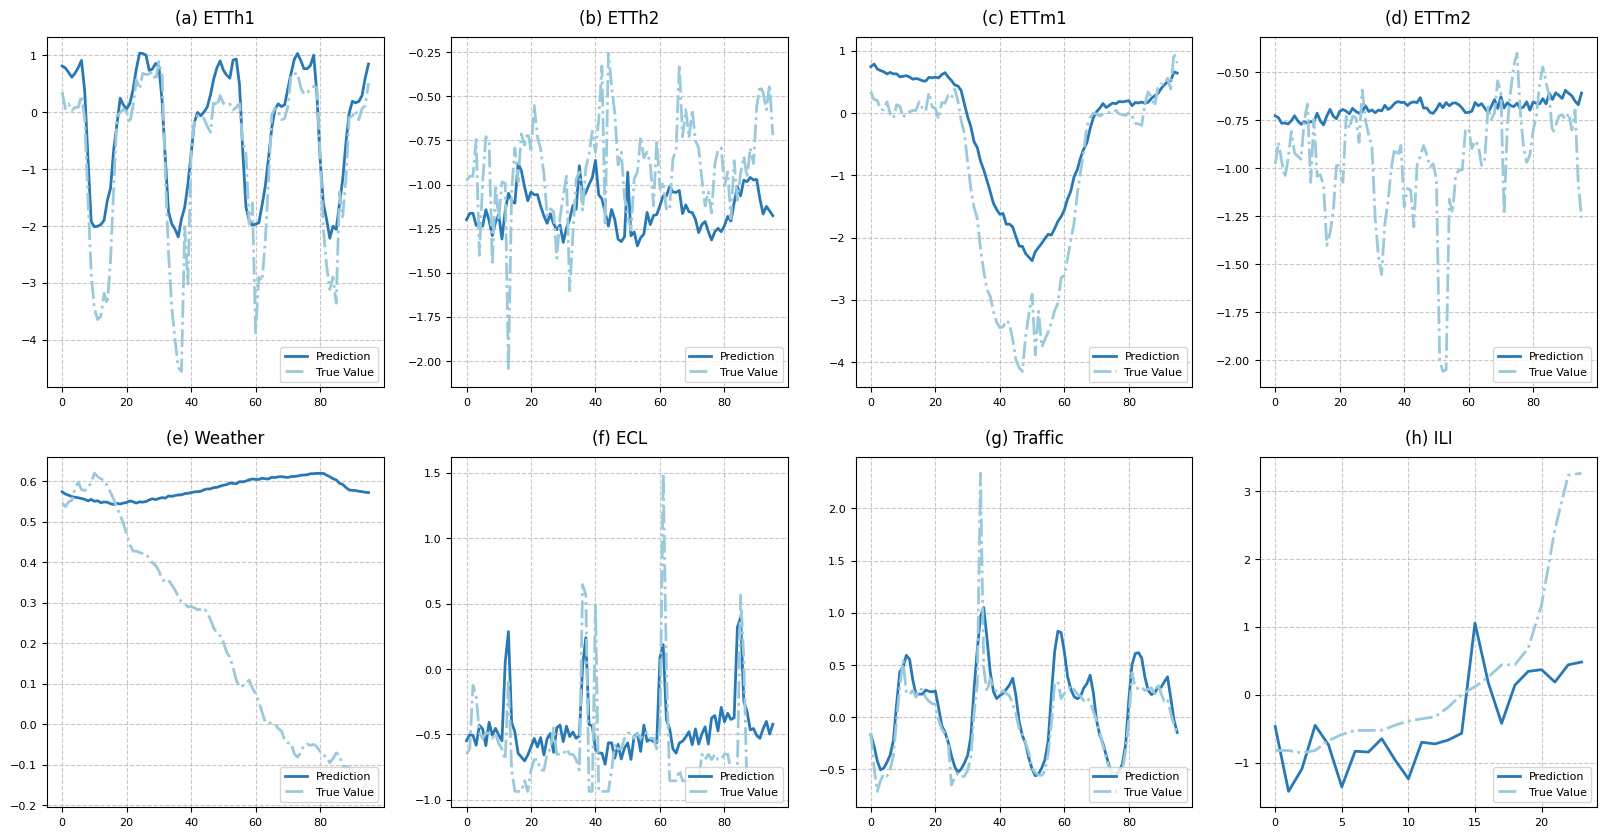

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()  # 将二维数组展平以便于迭代

for i, dataset in enumerate(datasets):
    pred_path = f"./vis_forecasting/{dataset}/pred.npy"
    true_path = f"./vis_forecasting/{dataset}/true.npy"
    try:
        pred = np.load(pred_path)[0,:,0]
        true = np.load(true_path)[0,:,0]
        
        ax = axes[i]
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.plot(pred, label='Prediction', linestyle='-',color=colors[0],linewidth=2)
        ax.plot(true, label='True Value', linestyle='-.',color=colors[1],linewidth=2)
        
        ax.set_title(f"({chr(97 + i)}) {dataset}", loc='center',pad=10,fontsize=12)  # 设置标题位置在x轴下方
        #ax.set_xlabel('Time Steps', fontsize=12)
        #ax.set_ylabel('Value', fontsize=10)

        # 设置刻度标签的大小
        ax.tick_params(axis='both', labelsize=8)
        
        # 为每个子图添加图例
        ax.legend(loc='lower right', fontsize=8)
            
    except FileNotFoundError:
        print(f"Data not found for {dataset}. Skipping.")
        continue

plt.savefig('forecasting_plots.pdf', dpi=300, bbox_inches='tight')
plt.show()

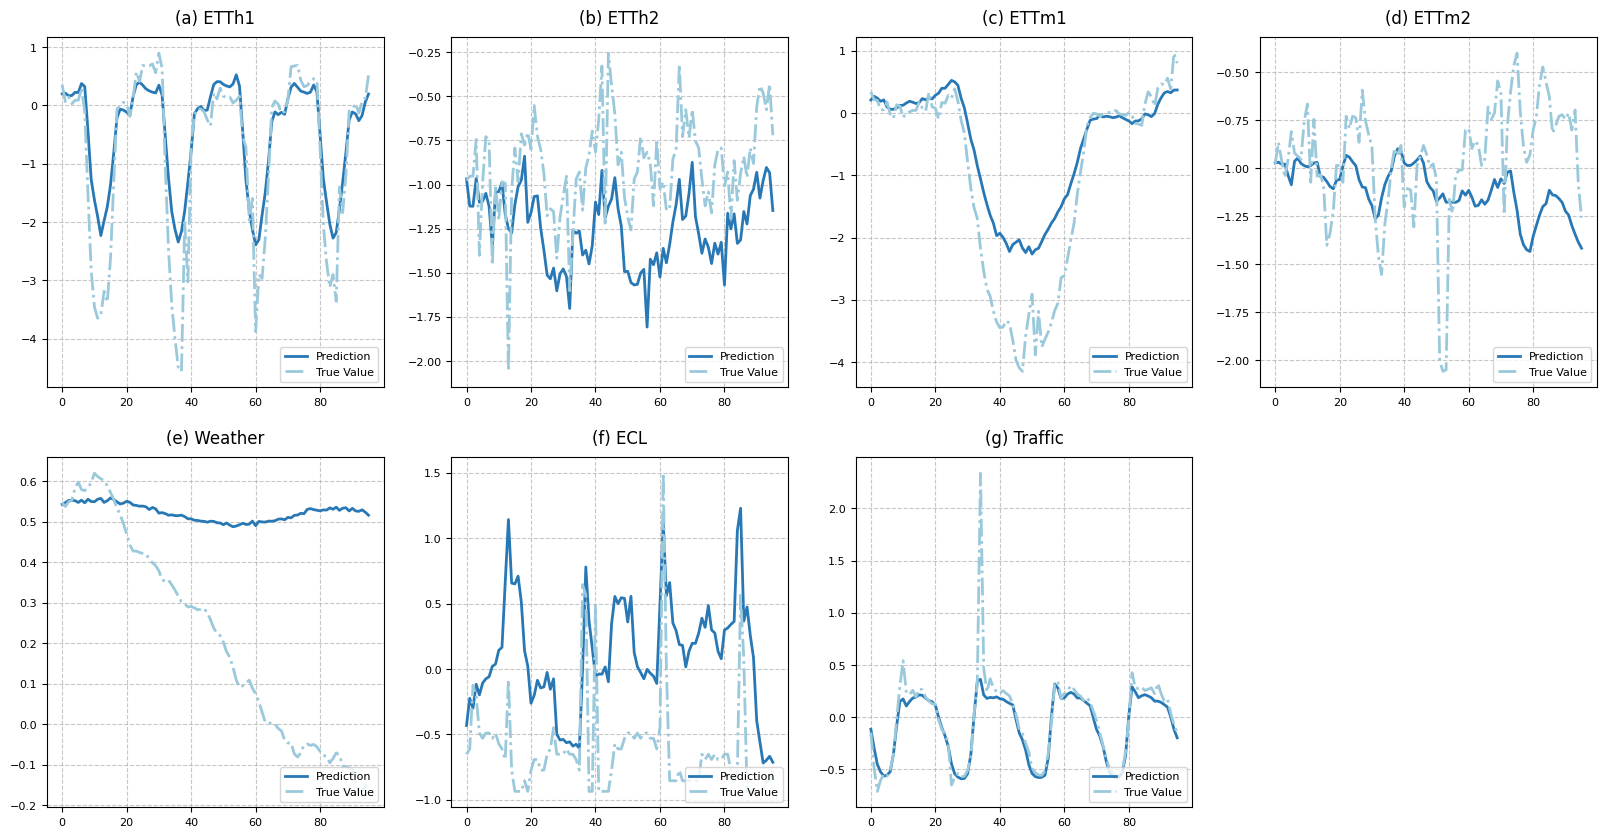

In [27]:
from asyncio import Task
import numpy as np
import matplotlib.pyplot as plt

task_name = 'long_term_forecast'
root_path = f'/home/siruzhong/projects/Time-VLM/results/{task_name}'

# 定义数据集路径
datasets = {
    'ETTh1': f'{root_path}_ETTh1_96_96_TimeVLM_ETTh1_ftM_sl512_ll48_pl96_dm128_fs1_0',
    'ETTh2': f'{root_path}_ETTh2_96_96_TimeVLM_ETTh2_ftM_sl512_ll48_pl96_dm128_fs1_0',
    'ETTm1': f'{root_path}_ETTm1_96_96_TimeVLM_ETTm1_ftM_sl512_ll48_pl96_dm128_fs1_0',
    'ETTm2': f'{root_path}_ETTm2_96_96_TimeVLM_ETTm2_ftM_sl512_ll48_pl96_dm128_fs1_0',
    'Weather': f'{root_path}_weather_96_96_TimeVLM_custom_ftM_sl512_ll48_pl96_dm128_fs1_0',
    'ECL': f'{root_path}_ECL_96_96_TimeVLM_custom_ftM_sl512_ll48_pl96_dm128_fs1_0',
    'Traffic': f'{root_path}_traffic_96_96_TimeVLM_custom_ftM_sl512_ll48_pl96_dm128_fs1_0'
}

colors = ['#2878B5', '#9AC9DB']  # 蓝色系配色
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()  # 将二维数组展平以便于迭代

# 遍历数据集
for i, (dataset_name, dataset_path) in enumerate(datasets.items()):
    pred_path = f"{dataset_path}/pred.npy"
    true_path = f"{dataset_path}/true.npy"
    try:
        # 加载数据
        pred = np.load(pred_path)[0, :, 0]
        true = np.load(true_path)[0, :, 0]
        
        # 获取当前子图
        ax = axes[i]
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.plot(pred, label='Prediction', linestyle='-', color=colors[0], linewidth=2)
        ax.plot(true, label='True Value', linestyle='-.', color=colors[1], linewidth=2)
        
        # 设置标题
        ax.set_title(f"({chr(97 + i)}) {dataset_name}", loc='center', pad=10, fontsize=12)
        
        # 设置刻度标签大小
        ax.tick_params(axis='both', labelsize=8)
        
        # 添加图例
        ax.legend(loc='lower right', fontsize=8)
            
    except FileNotFoundError:
        print(f"Data not found for {dataset_name}. Skipping.")
        continue

# 隐藏最后一个子图
axes[7].set_visible(False)

# 保存图像
plt.savefig('timevlm_forecasting_result.png', dpi=300, bbox_inches='tight')
plt.show()

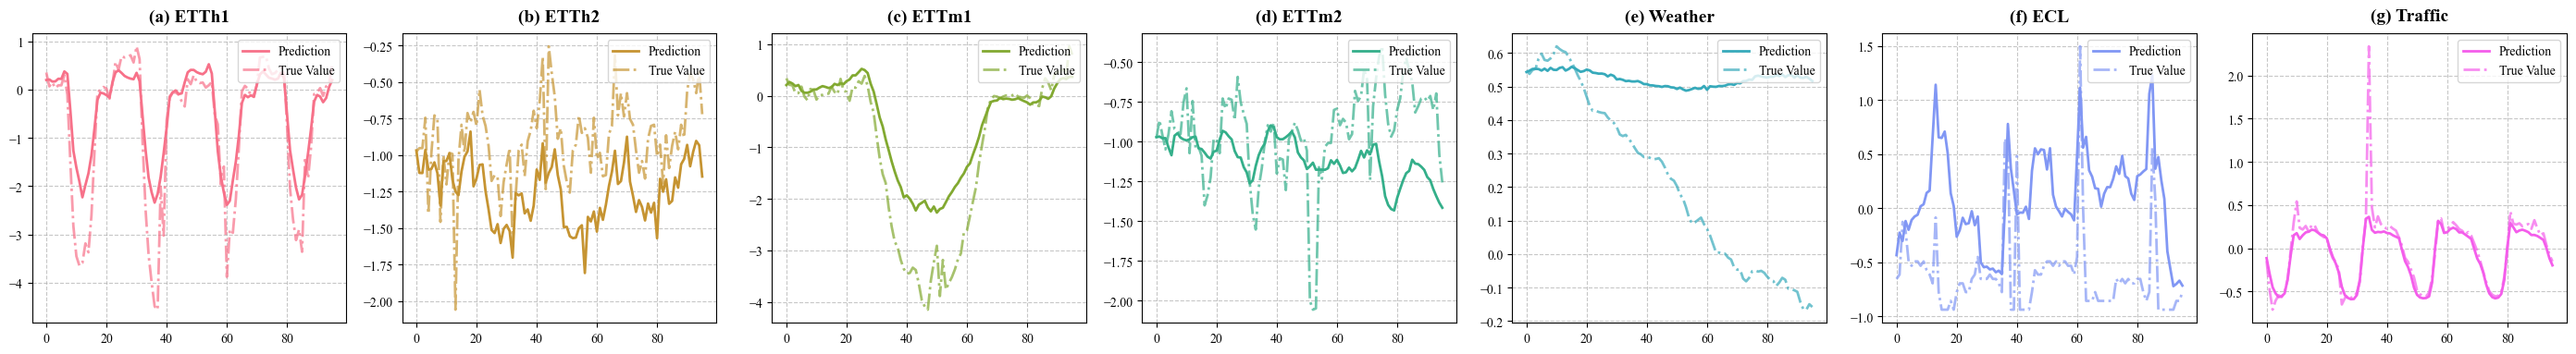

In [2]:
from asyncio import Task
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置全局字体为 Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

task_name = 'long_term_forecast'
root_path = f'/home/siruzhong/projects/Time-VLM/results/{task_name}'

# 定义数据集路径
datasets = {
    'ETTh1': f'{root_path}_ETTh1_96_96_TimeVLM_ETTh1_ftM_sl512_ll48_pl96_dm128_fs1_0',
    'ETTh2': f'{root_path}_ETTh2_96_96_TimeVLM_ETTh2_ftM_sl512_ll48_pl96_dm128_fs1_0',
    'ETTm1': f'{root_path}_ETTm1_96_96_TimeVLM_ETTm1_ftM_sl512_ll48_pl96_dm128_fs1_0',
    'ETTm2': f'{root_path}_ETTm2_96_96_TimeVLM_ETTm2_ftM_sl512_ll48_pl96_dm128_fs1_0',
    'Weather': f'{root_path}_weather_96_96_TimeVLM_custom_ftM_sl512_ll48_pl96_dm128_fs1_0',
    'ECL': f'{root_path}_ECL_96_96_TimeVLM_custom_ftM_sl512_ll48_pl96_dm128_fs1_0',
    'Traffic': f'{root_path}_traffic_96_96_TimeVLM_custom_ftM_sl512_ll48_pl96_dm128_fs1_0'
}

# 使用 seaborn 的调色板生成 7 种颜色
colors = sns.color_palette('husl', n_colors=7)

# 创建画布和子图（1 行 7 列）
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(28, 4))  # 调整画布大小以适应 7 个子图
axes = axes.flatten()  # 将二维数组展平以便于迭代

# 遍历数据集
for i, (dataset_name, dataset_path) in enumerate(datasets.items()):
    pred_path = f"{dataset_path}/pred.npy"
    true_path = f"{dataset_path}/true.npy"
    try:
        # 加载数据
        pred = np.load(pred_path)[0, :, 0]
        true = np.load(true_path)[0, :, 0]
        
        # 获取当前子图
        ax = axes[i]
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.plot(pred, label='Prediction', linestyle='-', color=colors[i], linewidth=2)
        ax.plot(true, label='True Value', linestyle='-.', color=colors[i], linewidth=2, alpha=0.7)
        
        # 设置标题
        ax.set_title(f"({chr(97 + i)}) {dataset_name}", loc='center', pad=10, fontsize=14, fontweight='bold')
        
        # 设置刻度标签大小
        ax.tick_params(axis='both', labelsize=10)
        
        # 添加图例
        ax.legend(loc='upper right', fontsize=10)
            
    except FileNotFoundError:
        print(f"Data not found for {dataset_name}. Skipping.")
        continue

# 调整布局
plt.tight_layout()

# 保存图像
plt.savefig('timevlm_forecasting_result.png', dpi=300, bbox_inches='tight')

# 显示图像
plt.show()